In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from utils import greek_symbol_to_text, get_simple_name

%matplotlib inline

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=1.5)

DATA_DIR = Path('../data')

## Load Data

In [2]:
df = pd.read_pickle(DATA_DIR /'siju-dataframe-unprocessed.pkl')

original_shape = df.shape
print(f'Dataframe shape: {original_shape}')

df.head()

Dataframe shape: (5910, 22)


,experiment_id,stimulus,valence,dorsal_to_ventral,hours_starved,order_presented,virgin,lobe,adaptation,pre_std,...,response_std,fly_id,fly_day_id,mated_single,df_mean,df_f,ΔF/F,pre_ΔF/F,greek_lobe,hours starved
0,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,a1,0.007500,0.030948,...,0.181160,2016-08-09 00:00:000,0,NaN,0.341723,0.341723,0.341723,0.021723,α1,0
1,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,a2,-0.010356,0.020711,...,0.157602,2016-08-09 00:00:000,0,NaN,0.230774,0.230774,0.230774,0.017802,α2,0
2,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,a3,-0.027494,0.026490,...,0.343259,2016-08-09 00:00:000,0,NaN,1.023435,1.023435,1.023435,0.020086,α3,0
3,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,ap1,0.026010,0.041217,...,0.258084,2016-08-09 00:00:000,0,NaN,0.476658,0.476658,0.476658,0.028166,α'1,0
4,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,ap2,0.000798,0.041212,...,0.268255,2016-08-09 00:00:000,0,NaN,0.412485,0.412485,0.412485,0.034686,α'2,0


## Clean Data

### 1. Remove the stimuli which are not found in the Hige data

In [3]:
df = df.drop('order_presented', axis=1)
df = df.drop_duplicates()

#15 compartments
total_trials =  df.shape[0] /15
print(total_trials)

393.0


In [4]:
print(f'Siju stimuli: {df.stimulus.unique()}')

# Stimuli not used in the Hige data
uncommon_stimuli = ['high_Vinegar', 'cVA', 'Isoamylacetate', 'Geosmin']
df = df[~df["stimulus"].isin(uncommon_stimuli)]

reduced_trials =  df.shape[0] / 15
print(f'Common stimuli: {df.stimulus.unique()}')

print(total_trials, reduced_trials, total_trials - reduced_trials)
print(df.shape[0] /15 )

Siju stimuli: ['Citronella' 'Vinegar' 'Yeast' 'Peppermint' '2-Heptanone' '1-Hexanol'
 'cVA' 'Geosmin' '4MCH' 'Isoamylacetate' '3Octanol' 'Ethanol'
 'high_Vinegar']
Common stimuli: ['Citronella' 'Vinegar' 'Yeast' 'Peppermint' '2-Heptanone' '1-Hexanol'
 '4MCH' '3Octanol' 'Ethanol']
393.0 253.0 140.0
253.0


### 2. Remove any starved flies

In [5]:
df = df[df['hours_starved'] == 0]
reduced_trials_2 =  df.shape[0] / 15

print(total_trials, reduced_trials_2, reduced_trials - reduced_trials_2)

393.0 90.0 163.0


### 3. Remove irrelevent columns

In [6]:
df_minimal = df[['experiment_id', 'stimulus', 'greek_lobe', 'ΔF/F']]
df_minimal.columns = ['id', 'stimulus', 'lobe', 'DAN dF/F']

print(f'Final shape {df_minimal.shape}')

df_minimal.head(10)

Final shape (1350, 4)


,id,stimulus,lobe,DAN dF/F
0,TH-58E02_090816_Citronella,Citronella,α1,0.341723
1,TH-58E02_090816_Citronella,Citronella,α2,0.230774
2,TH-58E02_090816_Citronella,Citronella,α3,1.023435
3,TH-58E02_090816_Citronella,Citronella,α'1,0.476658
4,TH-58E02_090816_Citronella,Citronella,α'2,0.412485
5,TH-58E02_090816_Citronella,Citronella,α'3,0.226218
6,TH-58E02_090816_Citronella,Citronella,β1,0.624777
7,TH-58E02_090816_Citronella,Citronella,β2,0.990563
8,TH-58E02_090816_Citronella,Citronella,β'1,0.586997
9,TH-58E02_090816_Citronella,Citronella,β'2,0.837626


In [7]:
df.groupby('stimulus').count()/15

,experiment_id,valence,dorsal_to_ventral,hours_starved,virgin,lobe,adaptation,pre_std,single_pre_std,single_pre_amp,response_std,fly_id,fly_day_id,mated_single,df_mean,df_f,ΔF/F,pre_ΔF/F,greek_lobe,hours starved
stimulus,,,,,,,,,,,,,,,,,,,,
1-Hexanol,8.0,0.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0,8.0
2-Heptanone,9.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0
3Octanol,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0,8.0
4MCH,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,0.0,11.0,11.0,11.0,11.0,11.0,11.0
Citronella,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,0.0,11.0,11.0,11.0,11.0,11.0,11.0
Ethanol,6.0,0.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0,6.0
Peppermint,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0
Vinegar,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,0.0,11.0,11.0,11.0,11.0,11.0,11.0
Yeast,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,0.0,14.0,14.0,14.0,14.0,14.0,14.0


### Explore the final dataset

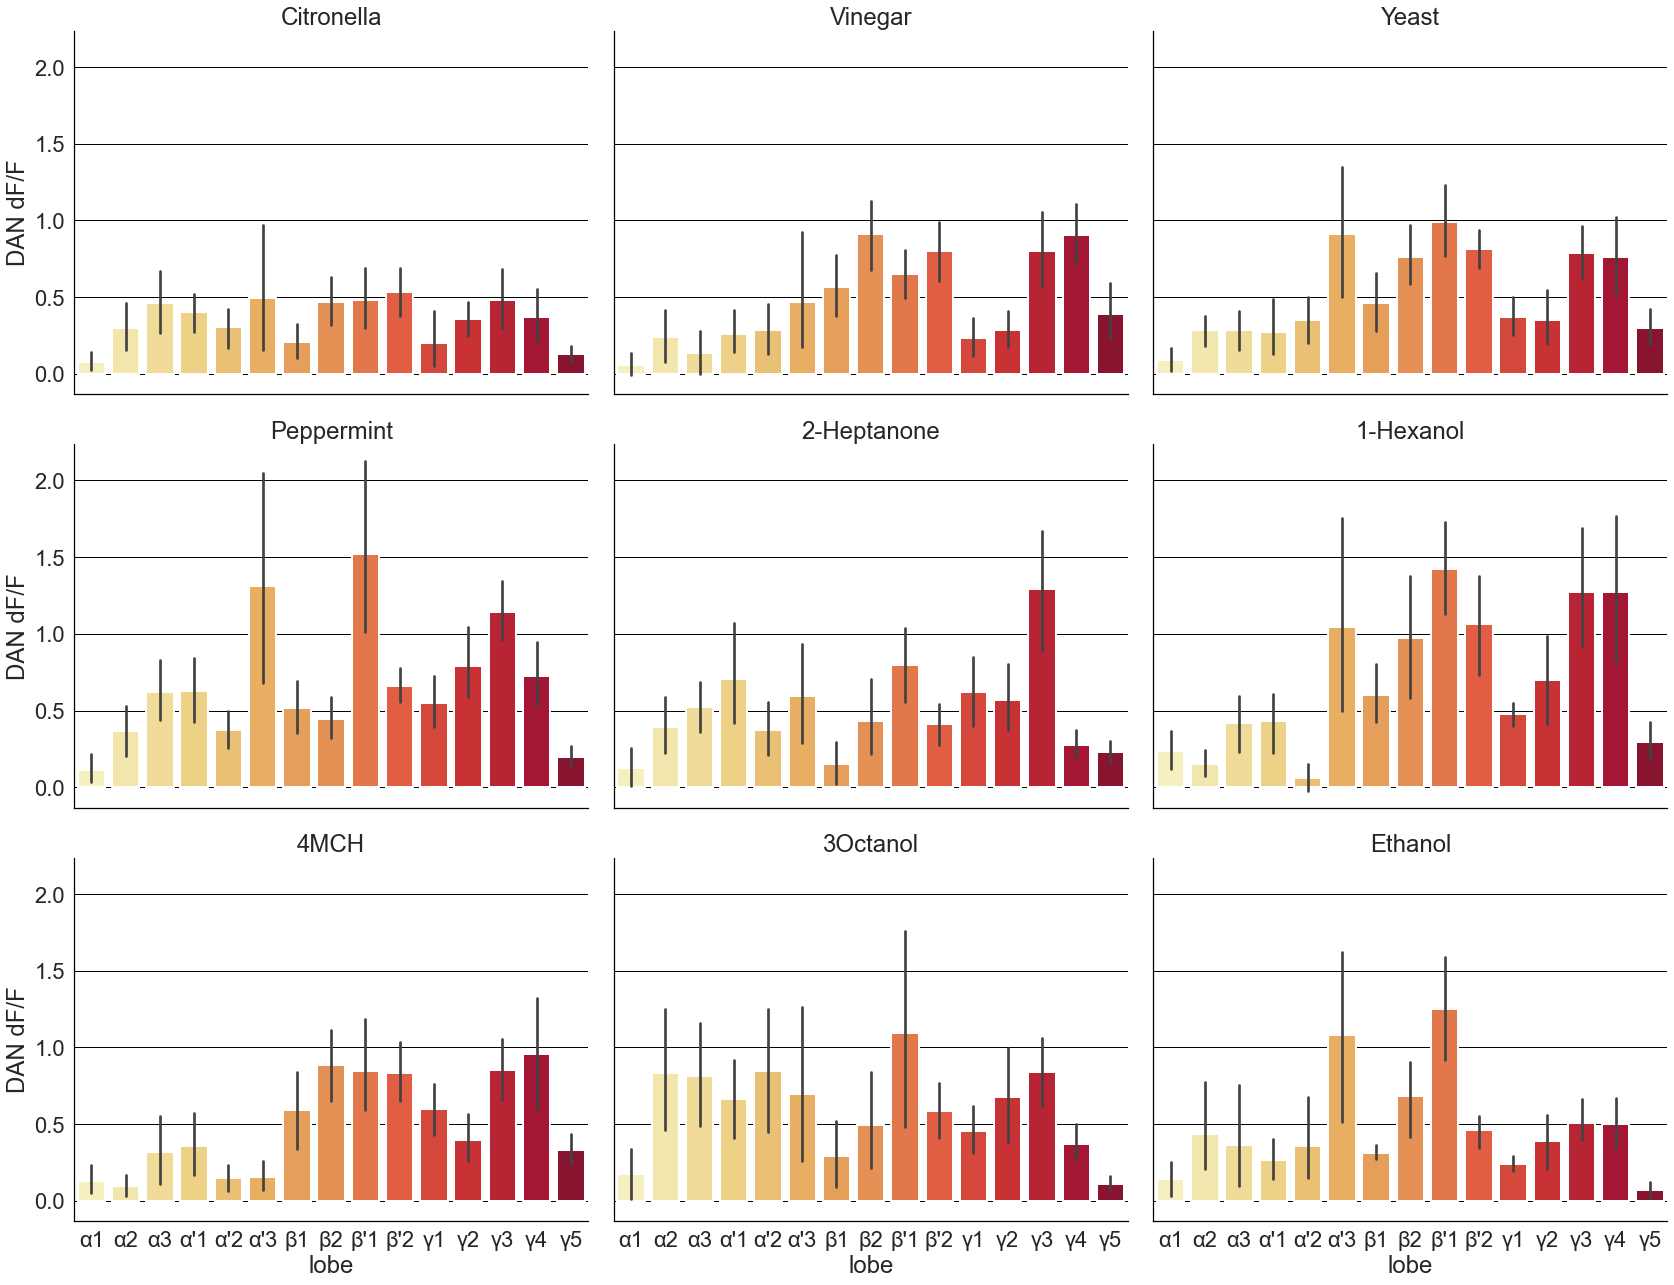

In [8]:
sns.set_context("notebook",font_scale=2)

b = sns.catplot(
    x="lobe", 
    y="DAN dF/F", 
    col="stimulus", 
    col_wrap=3, 
    data=df_minimal, 
    linewidth=2, 
    kind="bar",
    palette='YlOrRd',
    height=6, 
    aspect=1.3
)
b.set_titles("{col_name}") 

#hige-activity-per-stim

In [9]:
description = df_minimal.groupby(['stimulus', 'lobe']).describe()
description.head(20)

DAN dF/F                                                    \
                    count      mean       std       min       25%       50%   
stimulus    lobe                                                              
1-Hexanol   α'1       8.0  0.432535  0.295953 -0.065685  0.329028  0.447560   
            α'2       8.0  0.060010  0.138788 -0.142618 -0.022552  0.050003   
            α'3       8.0  1.047047  1.006725  0.084156  0.447967  0.656651   
            α1        8.0  0.237846  0.203406  0.016558  0.101950  0.174284   
            α2        8.0  0.150805  0.132932 -0.004159  0.077449  0.110407   
            α3        8.0  0.419109  0.285916 -0.047834  0.212802  0.481722   
            β'1       8.0  1.424355  0.468019  0.776379  1.249545  1.386894   
            β'2       8.0  1.063830  0.510704  0.453682  0.592557  1.069327   
            β1        8.0  0.601346  0.288164  0.249101  0.432963  0.502472   
            β2        8.0  0.976017  0.635970  0.246948  0.335735  1.042505   
            γ1        8.0  0.476267  0.116825  0.285408  0.408466  0.506937   
            γ2        8.0  0.700662  0.444821 -0.037708  0.421827  0.715467   
            γ3        8.0  1.273928  0.569758  0.666890  0.924858  1.139054   
            γ4        8.0  1.272242  0.737400  0.476132  0.626636  1.096913   
            γ5        8.0  0.292688  0.193645  0.115164  0.178682  0.239121   
2-Heptanone α'1       9.0  0.707905  0.546897  0.170889  0.340021  0.593611   
            α'2       9.0  0.374887  0.282783  0.080005  0.147566  0.308077   
            α'3       9.0  0.592451  0.544467 -0.018796  0.145283  0.510481   
            α1        9.0  0.123494  0.204274 -0.103485 -0.041779  0.101178   
            α2        9.0  0.393083  0.295746  0.130731  0.150289  0.303822   

                                      
                       75%       max  
stimulus    lobe                      
1-Hexanol   α'1   0.609375  0.834951  
            α'2   0.173087  0.231038  
            α'3   1.320804  3.207139  
            α1    0.334364  0.599646  
            α2    0.214529  0.422269  
            α3    0.583899  0.773601  
            β'1   1.517711  2.345692  
            β'2   1.370126  1.791662  
            β1    0.743304  1.068013  
            β2    1.381639  1.930191  
            γ1    0.547588  0.624003  
            γ2    0.936620  1.338793  
            γ3    1.458101  2.344661  
            γ4    1.857650  2.298872  
            γ5    0.335761  0.730222  
2-Heptanone α'1   0.924371  1.922710  
            α'2   0.467100  0.979198  
            α'3   0.939318  1.635195  
            α1    0.277777  0.491867  
            α2    0.555164  0.965647

In [10]:
number_trials_per_stimulus = df_minimal['stimulus'].value_counts()/15
number_trials_per_stimulus = number_trials_per_stimulus.to_frame()
number_trials_per_stimulus.columns = ['experiment count']
number_trials_per_stimulus

,experiment count
Yeast,14.0
Peppermint,12.0
Citronella,11.0
Vinegar,11.0
4MCH,11.0
2-Heptanone,9.0
1-Hexanol,8.0
3Octanol,8.0
Ethanol,6.0


### Average the activity

In [11]:
processed_data = df_minimal.groupby(['stimulus', 'lobe']).mean()
processed_data = processed_data.reset_index()

processed_data

,stimulus,lobe,DAN dF/F
0,1-Hexanol,α'1,0.432535
1,1-Hexanol,α'2,0.060010
2,1-Hexanol,α'3,1.047047
3,1-Hexanol,α1,0.237846
4,1-Hexanol,α2,0.150805
...,...,...,...
130,Yeast,γ1,0.368418
131,Yeast,γ2,0.348750
132,Yeast,γ3,0.789629
133,Yeast,γ4,0.761678


### Save data

In [12]:
processed_data.to_pickle(DATA_DIR / 'siju-cleaned-averaged.pkl')


## Try boost dataset size

Do not take the mean of the dataset

In [13]:
df = df_minimal.copy(deep=True)

In [14]:
df['lobe'] = df['lobe'].apply(greek_symbol_to_text)

pivot = df.pivot_table(index='id', columns='lobe')
pivot

DAN dF/F                                          \
lobe                         alpha'1   alpha'2   alpha'3    alpha1    alpha2   
id                                                                             
011216_Vin 1                0.029883  0.087839  0.085105  0.060092  0.143725   
011216_Vin 2                0.045474  0.065226 -0.024473  0.075000 -0.002336   
030217_Vin 1                0.851325  0.525972  0.318629  0.188833  0.492455   
030217_Vin 2                0.272472  0.683025  0.686634  0.063746  0.328758   
070318_FED_2-Heptanone 1    1.922710  0.979198  0.939318  0.101178  0.695670   
...                              ...       ...       ...       ...       ...   
TH-58E02_160816_Yeast       1.488226  0.844516  0.834194  0.293759  0.289101   
TH-58E02_170816_Citronella  0.432107  0.527736  0.175783  0.034967  0.245432   
TH-58E02_170816_Vinegar     0.388782  0.453452  0.188035  0.049265  0.164722   
TH-58E02_230816_Citronella  0.429985  0.201972  0.617254  0.156067  0.130012   
TH-58E02_230816_Yeast       0.312275  0.472030  1.228967  0.123108  0.355818   

                                                                              \
lobe                          alpha3    beta'1    beta'2     beta1     beta2   
id                                                                             
011216_Vin 1                0.109567  0.118666  0.396841  0.193028  0.682943   
011216_Vin 2                0.040234  0.379139  1.214203  0.998092  1.056843   
030217_Vin 1                0.239975  1.021376  1.297532  0.832900  1.421882   
030217_Vin 2                0.088245  0.318654  0.133364  0.051271  0.026538   
070318_FED_2-Heptanone 1    0.752811  1.321375  0.674216  0.149812  0.300067   
...                              ...       ...       ...       ...       ...   
TH-58E02_160816_Yeast       0.447392  1.373199  0.963126  0.644564  0.965781   
TH-58E02_170816_Citronella  0.371485  0.457447  0.520961  0.281905  0.639173   
TH-58E02_170816_Vinegar     0.368950  0.524701  0.669383  0.296335  0.776462   
TH-58E02_230816_Citronella  0.291127  0.509043  0.728653  0.310443  0.733599   
TH-58E02_230816_Yeast       0.617958  0.525270  0.873497  0.194214  0.952429   

                                                                              
lobe                          gamma1    gamma2    gamma3    gamma4    gamma5  
id                                                                            
011216_Vin 1                0.028860  0.074319  0.104261  0.246984  0.194801  
011216_Vin 2                0.048027  0.139642  0.242814  0.889639  1.000020  
030217_Vin 1                0.540017  0.656940  0.805257  1.028026  0.982736  
030217_Vin 2                0.001714  0.079687  0.380692  0.614266  0.379149  
070318_FED_2-Heptanone 1    0.815689  1.026986  2.245334  0.496967  0.302525  
...                              ...       ...       ...       ...       ...  
TH-58E02_160816_Yeast       0.521899  1.363752  1.414346  0.858626  0.864457  
TH-58E02_170816_Citronella  0.047926  0.671082  0.632577  0.304596  0.075477  
TH-58E02_170816_Vinegar     0.027765  0.500556  0.858627  0.703386  0.154679  
TH-58E02_230816_Citronella  0.039532  0.405187  0.193033  0.133734  0.148139  
TH-58E02_230816_Yeast       0.196909  0.489461  0.585132  0.588839  0.143184  

[90 rows x 15 columns]

In [15]:
def retrieve_stimulus_name(x):
    x = x.split('_')[-1].lower()

    if x.startswith('v'): return 'vinegar'
    elif x.startswith('2'): return '2-heptanone'
    elif x.startswith('y'): return 'yeast'
    elif x.startswith('1'): return '1-hexanol'
    elif x.startswith('c'): return 'citronella'
    elif x.startswith('p'): return 'peppermint'
    elif x.startswith('4'): return 'mch'
    elif x.startswith('3'): return 'octanol'
    elif x.startswith('e'): return 'ethanol'
    else: return 'nothing yet'

In [16]:
pivot['stimulus'] = pivot.index
pivot['stimulus'] = pivot['stimulus'].apply(retrieve_stimulus_name)
pivot['stimulus'] = pivot['stimulus'].apply(get_simple_name)


# rearrage the columns
pivot = pivot[['stimulus', 'DAN dF/F']]
pivot = pivot.sort_values('stimulus')

In [17]:
pivot

stimulus  DAN dF/F                      \
lobe                                              alpha'1   alpha'2   alpha'3   
id                                                                              
TH-58E02_090816_Citronella           citronella  0.476658  0.412485  0.226218   
TH-58E02_170816_Citronella           citronella  0.432107  0.527736  0.175783   
181022_TH58E02G6f_ST00_0_Citronella  citronella  0.423704  0.083843  0.379430   
171016_Citronella 2                  citronella  0.610923  0.427451 -0.009572   
171016_Citronella 1                  citronella  0.671743  0.539444  2.572961   
...                                         ...       ...       ...       ...   
161128_0_TH58E02G6f_ST00_0_Yeast          yeast  0.190639  0.775408  1.802206   
190426_0_TH58E02G6f_ST00_0_Yeast          yeast  0.213975  0.737615  1.734336   
190425_0_TH58E02G6f_ST00_1_Yeast          yeast  0.017795  0.047730  2.127804   
181024_TH58E02G6f_ST00_1_Yeast            yeast  0.461839  0.287825  0.253117   
TH-58E02_230816_Yeast                     yeast  0.312275  0.472030  1.228967   

                                                                             \
lobe                                   alpha1    alpha2    alpha3    beta'1   
id                                                                            
TH-58E02_090816_Citronella           0.341723  0.230774  1.023435  0.586997   
TH-58E02_170816_Citronella           0.034967  0.245432  0.371485  0.457447   
181022_TH58E02G6f_ST00_0_Citronella -0.011456  0.097590  0.640199  0.695688   
171016_Citronella 2                  0.135995  0.637080  0.009996  0.079676   
171016_Citronella 1                  0.102841  0.927985  0.578673  0.682591   
...                                       ...       ...       ...       ...   
161128_0_TH58E02G6f_ST00_0_Yeast     0.314262  0.565209 -0.108726  0.922120   
190426_0_TH58E02G6f_ST00_0_Yeast     0.062400  0.593544  0.549394  1.523920   
190425_0_TH58E02G6f_ST00_1_Yeast    -0.113967  0.211960  0.427749  0.443309   
181024_TH58E02G6f_ST00_1_Yeast      -0.008476  0.314526  0.613227  1.435698   
TH-58E02_230816_Yeast                0.123108  0.355818  0.617958  0.525270   

                                                                             \
lobe                                   beta'2     beta1     beta2    gamma1   
id                                                                            
TH-58E02_090816_Citronella           0.837626  0.624777  0.990563  0.051930   
TH-58E02_170816_Citronella           0.520961  0.281905  0.639173  0.047926   
181022_TH58E02G6f_ST00_0_Citronella  0.670628  0.269143  0.506330  0.251025   
171016_Citronella 2                  0.021876 -0.013304 -0.007225 -0.015125   
171016_Citronella 1                  0.582773  0.211340  0.530082  0.377056   
...                                       ...       ...       ...       ...   
161128_0_TH58E02G6f_ST00_0_Yeast     1.096265  0.627441  1.131869  0.145988   
190426_0_TH58E02G6f_ST00_0_Yeast     0.921196  1.001585  0.522455  0.922026   
190425_0_TH58E02G6f_ST00_1_Yeast     0.598975  0.030974  0.359698  0.397298   
181024_TH58E02G6f_ST00_1_Yeast       0.690922  0.274412  0.752191  0.749654   
TH-58E02_230816_Yeast                0.873497  0.194214  0.952429  0.196909   

                                                                             
lobe                                   gamma2    gamma3    gamma4    gamma5  
id                                                                           
TH-58E02_090816_Citronella           0.292853  0.707377  0.790165  0.337667  
TH-58E02_170816_Citronella           0.671082  0.632577  0.304596  0.075477  
181022_TH58E02G6f_ST00_0_Citronella  0.406841  1.010089  0.882712  0.095707  
171016_Citronella 2                  0.128165  0.039962  0.047961  0.020380  
171016_Citronella 1                  0.601208  0.659796  0.434064  0.096403  
...                                       ...       ...       ... 

In [18]:
pivot.shape

(90, 16)

In [19]:
pivot.head(20)

stimulus  DAN dF/F            \
lobe                                                alpha'1   alpha'2   
id                                                                      
TH-58E02_090816_Citronella             citronella  0.476658  0.412485   
TH-58E02_170816_Citronella             citronella  0.432107  0.527736   
181022_TH58E02G6f_ST00_0_Citronella    citronella  0.423704  0.083843   
171016_Citronella 2                    citronella  0.610923  0.427451   
171016_Citronella 1                    citronella  0.671743  0.539444   
170206_0_TH58E02G6f_ST00_0_Citronella  citronella  0.579707  0.515238   
TH-58E02_100816_Citronella             citronella  0.074022  0.081323   
181022_TH58E02G6f_ST00_1_Citronella    citronella  0.566389 -0.008650   
TH-58E02_230816_Citronella             citronella  0.429985  0.201972   
100217_Citronella 2                    citronella  0.150294  0.526108   
100217_Citronella 1                    citronella  0.003962  0.021492   
181214a_TH58E02G6f_ST00_1_Ethanol         ethanol  0.219558  0.229423   
181214a_TH58E02G6f_ST00_0_Ethanol         ethanol  0.180849  0.162146   
190114_TH58E02G6f_ST00_1_Ethanol          ethanol  0.080391  0.050828   
190115_TH58E02G6f_ST00_1_Ethanol          ethanol  0.542497  1.120975   
190114_TH58E02G6f_ST00_0_Ethanol          ethanol  0.122390  0.232802   
181217_TH58E02G6f_ST00_0_Ethanol          ethanol  0.450723  0.331299   
190130_TH58E02G6f_ST00_1_2Heptanone     heptanone  0.188793  0.080005   
180914b_TH58E02G6f_ST00_0_2Heptanone    heptanone  0.593611  0.467100   
190130_TH58E02G6f_ST00_0_2Heptanone     heptanone  0.340021  0.419953   

                                                                               \
lobe                                    alpha'3    alpha1    alpha2    alpha3   
id                                                                              
TH-58E02_090816_Citronella             0.226218  0.341723  0.230774  1.023435   
TH-58E02_170816_Citronella             0.175783  0.034967  0.245432  0.371485   
181022_TH58E02G6f_ST00_0_Citronella    0.379430 -0.011456  0.097590  0.640199   
171016_Citronella 2                   -0.009572  0.135995  0.637080  0.009996   
171016_Citronella 1                    2.572961  0.102841  0.927985  0.578673   
170206_0_TH58E02G6f_ST00_0_Citronella  0.014947  0.133521  0.387919 -0.002624   
TH-58E02_100816_Citronella             0.162766 -0.005692  0.096002  0.606761   
181022_TH58E02G6f_ST00_1_Citronella    0.235426 -0.031015  0.010509  0.699198   
TH-58E02_230816_Citronella             0.617254  0.156067  0.130012  0.291127   
100217_Citronella 2                    1.044857  0.007663  0.442740  0.834893   
100217_Citronella 1                    0.021565  0.005467  0.052473  0.052330   
181214a_TH58E02G6f_ST00_1_Ethanol      1.829732  0.285169  0.302191  0.433584   
181214a_TH58E02G6f_ST00_0_Ethanol      1.127212  0.364840  0.388118  0.280842   
190114_TH58E02G6f_ST00_1_Ethanol       0.101479 -0.034685  0.050175  0.027346   
190115_TH58E02G6f_ST00_1_Ethanol       1.881488  0.139967  1.196738  0.146160   
190114_TH58E02G6f_ST00_0_Ethanol       0.271479  0.079940  0.219242  0.045719   
181217_TH58E02G6f_ST00_0_Ethanol       1.260042  0.022343  0.464945  1.267140   
190130_TH58E02G6f_ST00_1_2Heptanone    0.145283 -0.103485  0.143614  0.641927   
180914b_TH58E02G6f_ST00_0_2Heptanone   0.010885  0.032019  0.433141  0.460159   
190130_TH58E02G6f_ST00_0_2Heptanone    0.961262 -0.100467  0.555164  0.983290   

                                                                               \
lobe                                     beta'1    beta'2     beta1     beta2   
id                                                                              
TH-58E02_090816_Citronella             0.586997  0.837626  0.624777  0.990563   
TH-58E02_170816_Citronella             0.457447  0.520961  0.281905  0.639173   
181022_TH58E02G6f_ST00_0_Citronella    0.695688  0.670628  0.269143  0.506330   
171016_Citr

In [20]:
pivot.to_pickle(DATA_DIR / 'siju-cleaned-expanded-pivot.pkl')

In [21]:
pivot

stimulus  DAN dF/F                      \
lobe                                              alpha'1   alpha'2   alpha'3   
id                                                                              
TH-58E02_090816_Citronella           citronella  0.476658  0.412485  0.226218   
TH-58E02_170816_Citronella           citronella  0.432107  0.527736  0.175783   
181022_TH58E02G6f_ST00_0_Citronella  citronella  0.423704  0.083843  0.379430   
171016_Citronella 2                  citronella  0.610923  0.427451 -0.009572   
171016_Citronella 1                  citronella  0.671743  0.539444  2.572961   
...                                         ...       ...       ...       ...   
161128_0_TH58E02G6f_ST00_0_Yeast          yeast  0.190639  0.775408  1.802206   
190426_0_TH58E02G6f_ST00_0_Yeast          yeast  0.213975  0.737615  1.734336   
190425_0_TH58E02G6f_ST00_1_Yeast          yeast  0.017795  0.047730  2.127804   
181024_TH58E02G6f_ST00_1_Yeast            yeast  0.461839  0.287825  0.253117   
TH-58E02_230816_Yeast                     yeast  0.312275  0.472030  1.228967   

                                                                             \
lobe                                   alpha1    alpha2    alpha3    beta'1   
id                                                                            
TH-58E02_090816_Citronella           0.341723  0.230774  1.023435  0.586997   
TH-58E02_170816_Citronella           0.034967  0.245432  0.371485  0.457447   
181022_TH58E02G6f_ST00_0_Citronella -0.011456  0.097590  0.640199  0.695688   
171016_Citronella 2                  0.135995  0.637080  0.009996  0.079676   
171016_Citronella 1                  0.102841  0.927985  0.578673  0.682591   
...                                       ...       ...       ...       ...   
161128_0_TH58E02G6f_ST00_0_Yeast     0.314262  0.565209 -0.108726  0.922120   
190426_0_TH58E02G6f_ST00_0_Yeast     0.062400  0.593544  0.549394  1.523920   
190425_0_TH58E02G6f_ST00_1_Yeast    -0.113967  0.211960  0.427749  0.443309   
181024_TH58E02G6f_ST00_1_Yeast      -0.008476  0.314526  0.613227  1.435698   
TH-58E02_230816_Yeast                0.123108  0.355818  0.617958  0.525270   

                                                                             \
lobe                                   beta'2     beta1     beta2    gamma1   
id                                                                            
TH-58E02_090816_Citronella           0.837626  0.624777  0.990563  0.051930   
TH-58E02_170816_Citronella           0.520961  0.281905  0.639173  0.047926   
181022_TH58E02G6f_ST00_0_Citronella  0.670628  0.269143  0.506330  0.251025   
171016_Citronella 2                  0.021876 -0.013304 -0.007225 -0.015125   
171016_Citronella 1                  0.582773  0.211340  0.530082  0.377056   
...                                       ...       ...       ...       ...   
161128_0_TH58E02G6f_ST00_0_Yeast     1.096265  0.627441  1.131869  0.145988   
190426_0_TH58E02G6f_ST00_0_Yeast     0.921196  1.001585  0.522455  0.922026   
190425_0_TH58E02G6f_ST00_1_Yeast     0.598975  0.030974  0.359698  0.397298   
181024_TH58E02G6f_ST00_1_Yeast       0.690922  0.274412  0.752191  0.749654   
TH-58E02_230816_Yeast                0.873497  0.194214  0.952429  0.196909   

                                                                             
lobe                                   gamma2    gamma3    gamma4    gamma5  
id                                                                           
TH-58E02_090816_Citronella           0.292853  0.707377  0.790165  0.337667  
TH-58E02_170816_Citronella           0.671082  0.632577  0.304596  0.075477  
181022_TH58E02G6f_ST00_0_Citronella  0.406841  1.010089  0.882712  0.095707  
171016_Citronella 2                  0.128165  0.039962  0.047961  0.020380  
171016_Citronella 1                  0.601208  0.659796  0.434064  0.096403  
...                                       ...       ...       ... 